In [3]:
import torch
import sys

sys.path.append("/scratch/cv-course2025/group2/uzk_cvproject")
from fly_dataset import FLY_Dataset
from fly_resnet import FLY_Resnet
from fly_evaluate import fly_evaluate_visualize

path_to_data = "/scratch/cv-course2025/group2/data"

In [5]:
# Load the top 3 Models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

m50epoch = FLY_Resnet()
m50epoch.load_state_dict(torch.load("/scratch/cv-course2025/group2/uzk_cvproject/models/cam0_deep-fly-model-resnet50_20250706-051753_50epochs.pt"))
m50epoch.to(device)
print("model 50epoch loaded")

m10epoch = FLY_Resnet()
m10epoch.load_state_dict(torch.load("/scratch/cv-course2025/group2/uzk_cvproject/models/cam0_deep-fly-model-resnet50_20250707-193305_10epochs.pt"))
m10epoch.to(device)
print("model 10epoch loaded")

mBest = FLY_Resnet()
mBest.load_state_dict(torch.load("/scratch/cv-course2025/group2/uzk_cvproject/models/cam0_deep-fly-model-resnet50_20250711-020806_27epochs.pt"))
mBest.to(device)
print("Best model loaded")

test_dataset = FLY_Dataset(path_to_data, mode="test", backbone="resnet", cam=0)

model 50epoch loaded
model 10epoch loaded
Best model loaded


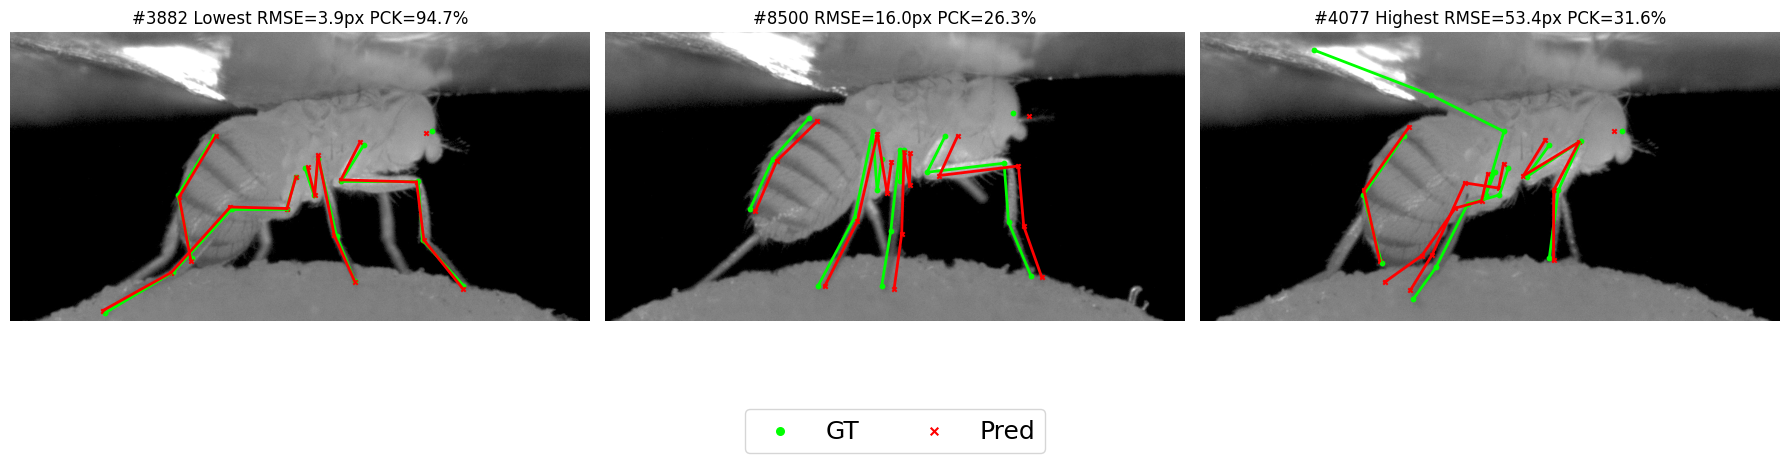

Evaluating: 100%|███████████████████████████████████████████████| 9000/9000 [02:05<00:00, 71.43it/s]


Results:  MSE=225.07px²,  RMSE=12.13px,  PCK@10px=47.42%


In [3]:
# Trained Model (50 epochs)
mean_mse, mean_rmse, mean_pck = fly_evaluate_visualize(m50epoch, test_dataset, device=device, pck_thresh=10)

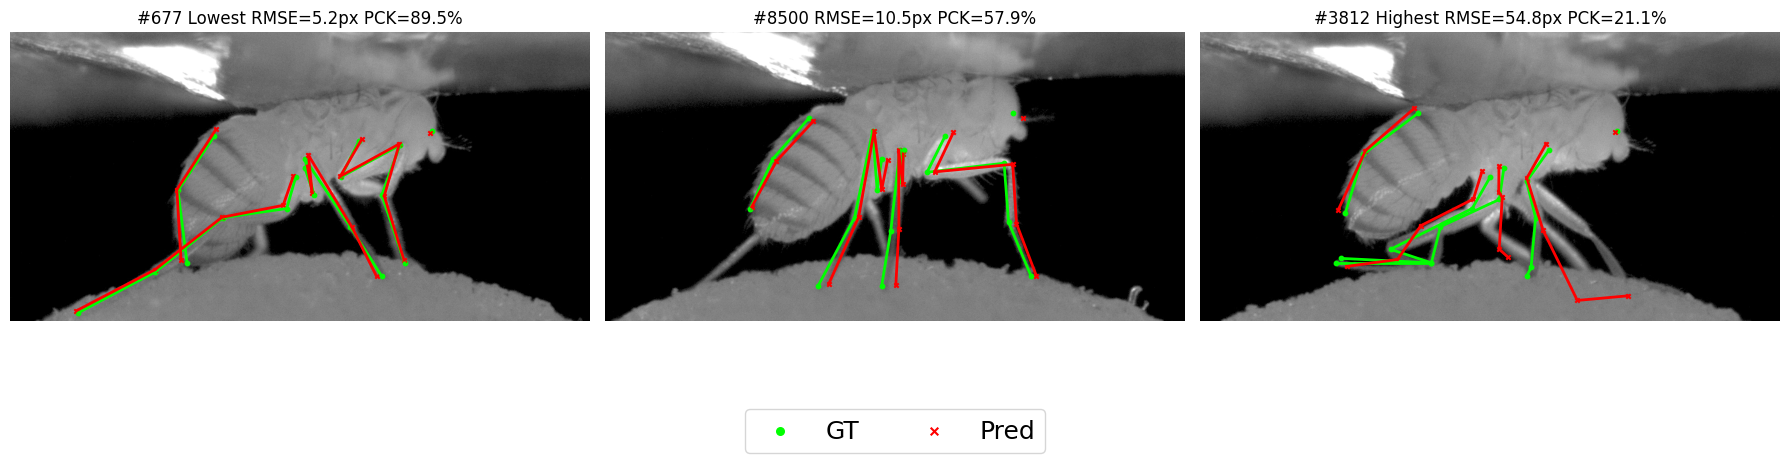

Evaluating: 100%|███████████████████████████████████████████████| 9000/9000 [02:05<00:00, 71.55it/s]


Results:  MSE=171.42px²,  RMSE=10.06px,  PCK@10px=59.78%


In [4]:
# Trained Model (10 epochs)
mean_mse, mean_rmse, mean_pck = fly_evaluate_visualize(m10epoch, test_dataset, device=device, pck_thresh=10)

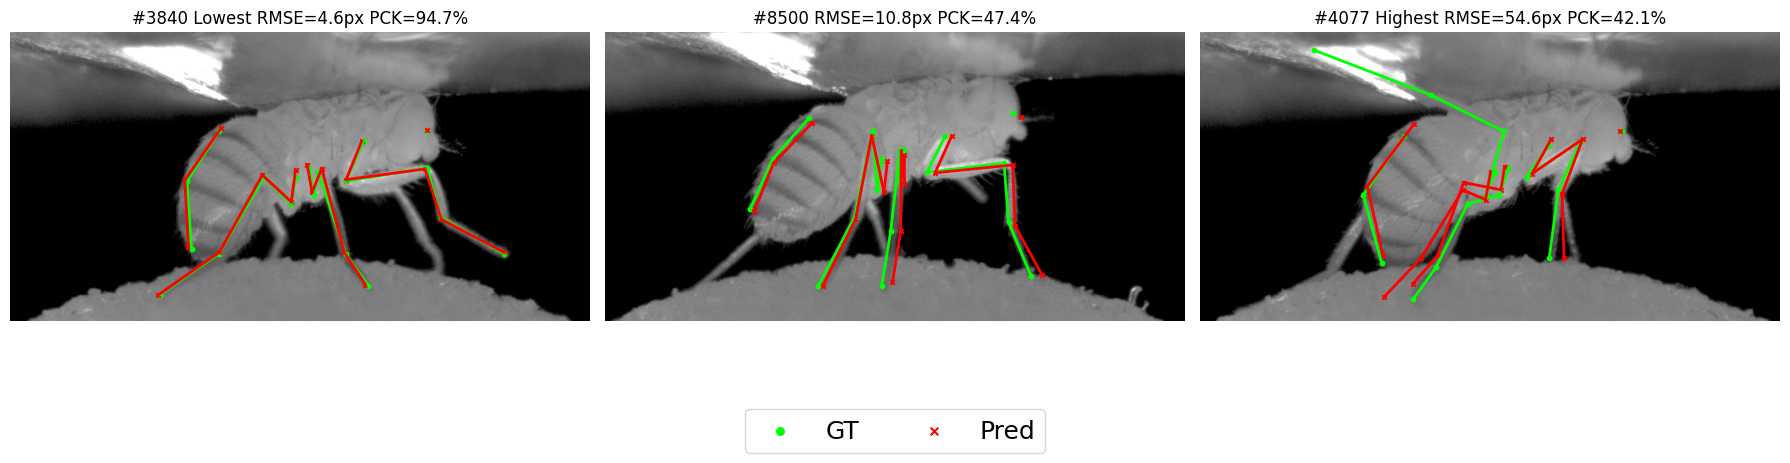

Evaluating: 100%|███████████████████████████████████████████████| 9000/9000 [02:16<00:00, 66.13it/s]


Results:  MSE=138.72px²,  RMSE=9.02px,  PCK@10px=67.89%


In [5]:
# Best Trained Model (27 epochs, early stopping)
mean_mse, mean_rmse, mean_pck = fly_evaluate_visualize(mBest, test_dataset, device=device, pck_thresh=10)